# Atividade 1 

Agora é com vocês. Nessa atividade vocês vão utilizar os métodos implementados nas aulas para resolver alguns problemas relacionados à teoria dos grafos. Preparados? 


In [ ]:
# importando a biblioteca 

import networkx as nx
import math

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt


In [ ]:
def exibir_grafo_q1(grafo):
  
  colors = ['red' if grafo[u][v]['asfaltada'] == False else 'green' for u,v in grafo.edges()]

  options = {
      'node_color': 'darkblue',
      'edge_color': colors,
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }

  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

In [ ]:
def get_info_asfaltada(grafo, v1, v2):
  return grafo[v1][v2]['asfaltada']

## Vamos ao problema


Um empresa está fazendo o mapeamento de uma região composta por conjuntos de casas que podem ser conectadas por estradas asfaltadas e estradas sem asfalto. O objetivo é agrupar qual conjunto de casas estão conectadas direta ou indiretamente por meio de estradas asfaltadas. A imagem a seguir representa uma imagem da região. 

<img src="https://data2learning.com/static_imgs/grafos_img1.png" />

Cada vértice representa um conjunto de casas. As arestas pontilhadas representam as estradas sem asfalto, as demais são estradas com asfalto. 

Implemente um algoritmo com base nos algoritmos estudados que permita identificar o conjunto de casas que estão conectados por estradas asfaltadas. Considere que seu algoritmo recebe como entrada um grafo da região com uma indicação em cada aresta que indique se aquela aresta está asfaltada ou não. 

O grafo está mapeado a seguir:

*As arestas verdes são as asfaltadas e as vermelhas as não asfaltadas*

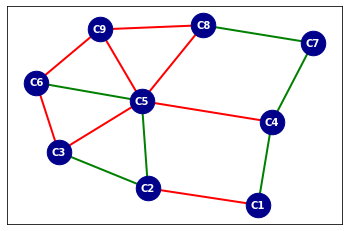

In [ ]:
# Instanciando o objeto Grafo
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from(["C1","C2","C3","C4","C5","C6","C7","C8","C9"])

# Adicionando as Arestas
G1.add_edge("C1", "C2", asfaltada=False)
G1.add_edge("C1", "C4", asfaltada=True)
G1.add_edge("C2", "C3", asfaltada=True)
G1.add_edge("C2", "C5", asfaltada=True)
G1.add_edge("C3", "C5", asfaltada=False)
G1.add_edge("C3", "C6", asfaltada=False)
G1.add_edge("C4", "C5", asfaltada=False)
G1.add_edge("C4", "C7", asfaltada=True)
G1.add_edge("C5", "C6", asfaltada=True)
G1.add_edge("C5", "C8", asfaltada=False)
G1.add_edge("C5", "C9", asfaltada=False)
G1.add_edge("C6", "C9", asfaltada=False)
G1.add_edge("C7", "C8", asfaltada=True)
G1.add_edge("C8", "C9", asfaltada=False)


exibir_grafo_q1(G1)


# Solução




In [ ]:
# Função que retorna um vértice adjacente não-visitado
# de um vértice passado como parâmetro

# Modificação: Retorna apenas quando a aresta é asfaltada (linha 2).

def get_no_visted_neighbors_bfs(graph_, node, visited_nodes):
  neighbors_node = [x for x in list(nx.neighbors(graph_, node)) if ((x not in visited_nodes) and (get_info_asfaltada(graph_, node, x)))]
  if len(neighbors_node) > 0: return neighbors_node
  else: None

In [ ]:

def bfs_interative(graph_, node, not_visited_nodes):

  queue_ = []
  visited_ = []
  explored_ = []

  queue_.append(node)
  visited_.append(node)
  not_visited_nodes.remove(node)

  while len(queue_) > 0:
    first_queue = queue_[0]
    nodes_not_visited = get_no_visted_neighbors_bfs(graph_, first_queue, visited_)
    if nodes_not_visited:
      queue_.extend(nodes_not_visited)
      visited_.extend(nodes_not_visited)
      for temp_node in nodes_not_visited:
        not_visited_nodes.remove(temp_node)
    
    explored_.append(queue_.pop(0))

  return explored_


In [ ]:
# Main

allHouses = list(G1.nodes())
housesToCheck = allHouses.copy()

groupsCounter = 1
while len(housesToCheck) > 0:
  verifiedConnectedHouses = bfs_interative(G1, housesToCheck[0], housesToCheck)

  try:
    for house in verifiedConnectedHouses:
      housesToCheck.remove(house)
  except:
    pass

  print('Grupo {}: {}'.format(groupsCounter, verifiedConnectedHouses))
  
  groupsCounter += 1



Grupo 1: ['C1', 'C4', 'C7', 'C8']
Grupo 2: ['C2', 'C3', 'C5', 'C6']
Grupo 3: ['C9']


# Como podemos resolver esse problema?




Agora é sua vez de junto com os seus colegas encontrar uma solução para o problema. Pense nos algoritmos de busca estudados e veja como podemos usa-los para ter a solução. Ao implementar a solução, aplique ao grafo dado. 

A resposta para o problema é: 

```
Grupo 1: ['C1', 'C4', 'C7', 'C8']
Grupo 2: ['C2', 'C3', 'C5', 'C6']
Grupo 3: ['C9']
```

Boa atividade e lembre: 

<img src="https://media.giphy.com/media/26DN48mfu3uWJ3J7y/giphy.gif" /> 